In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import re

import importlib
import matplotlib.pyplot as plt

from xgboost import XGBRegressor


from sklearn.model_selection import  train_test_split

import shap
shap.plots.initjs()

import pickle

import gzip

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import re

import importlib
import matplotlib.pyplot as plt

from xgboost import XGBRegressor


from sklearn.model_selection import  train_test_split

import shap
shap.plots.initjs()

import pickle

import gzip

In [2]:
import os
os.chdir('../')
import functions
# importlib.reload(functions.shap_calc)

from functions.model_wrapper import Tree_Model, xgboost_params
from functions.shap_calc import create_shape_explanation, plot_summary_plot, plot_bare_words, plot_waterfall

### I use the shap library to plot the impact of each feature in the GBM model.   
### I am unable to do it for the RFM model because it takes too long, likely because of the larger size of the trees relative to the GBM model.

In [3]:
df_all = pd.read_json("../data/deduped_mod_winemag-data-130k-v2.json")


In [4]:
with gzip.open('../data/gzipX_all.pckl', 'rb') as f:
    X_all = pickle.load(f)
with gzip.open('../data/gzipy_all.pckl', 'rb') as f:
    y_all = pickle.load(f)


In [5]:
with open('../data/gbm_explanation_shap_20deep.pckl', 'rb') as f:
    explanation_test = pickle.load(f)

### This the simplest shap plots for the top 40 features determined by their shap values.

####  1. The norm-points feature is dominant, followed some famous grape types and locations.
####  2. Some tasters are good predictors of the price of wines they tast (trending toward higher prices).
####  3. 2014, 2015 2016 are not good vintages, probably because they were younger wines when the data were collected.

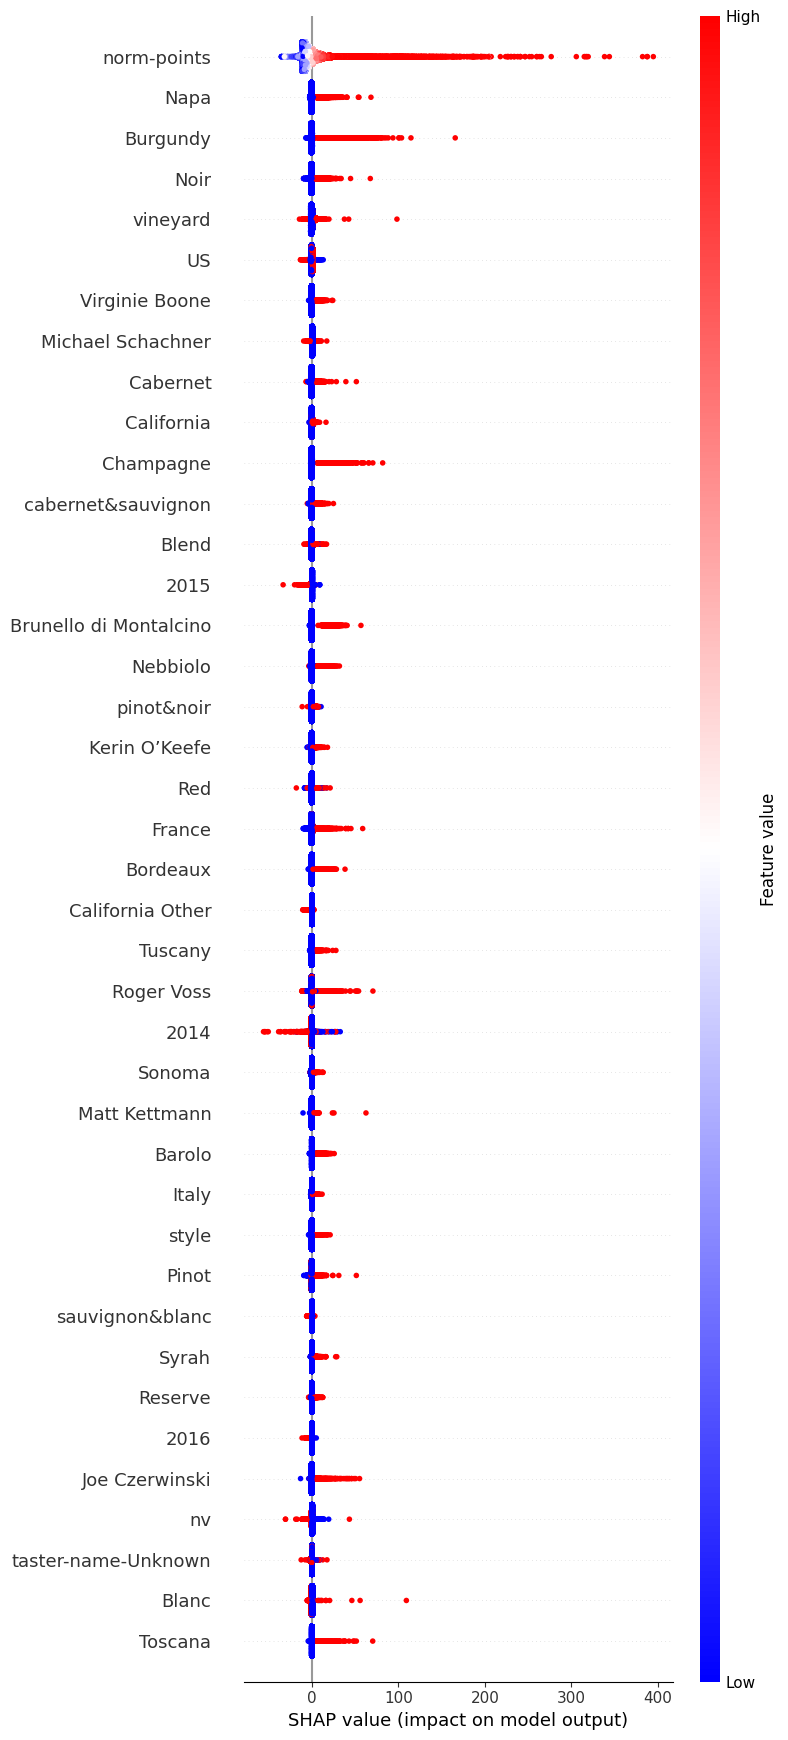

In [6]:
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=[], word_filter_exclusivity= True, max_display = 40, save_png_name="all")

### I removed the norm-points feature for easier viewing.
### I changed the color scheme because aside from norm-points, all other features are boolean.
### Light color means the word(s) are not present in the title or location.
### Since the feature counts mostly when it is "True", it is better to focus on the true values only.

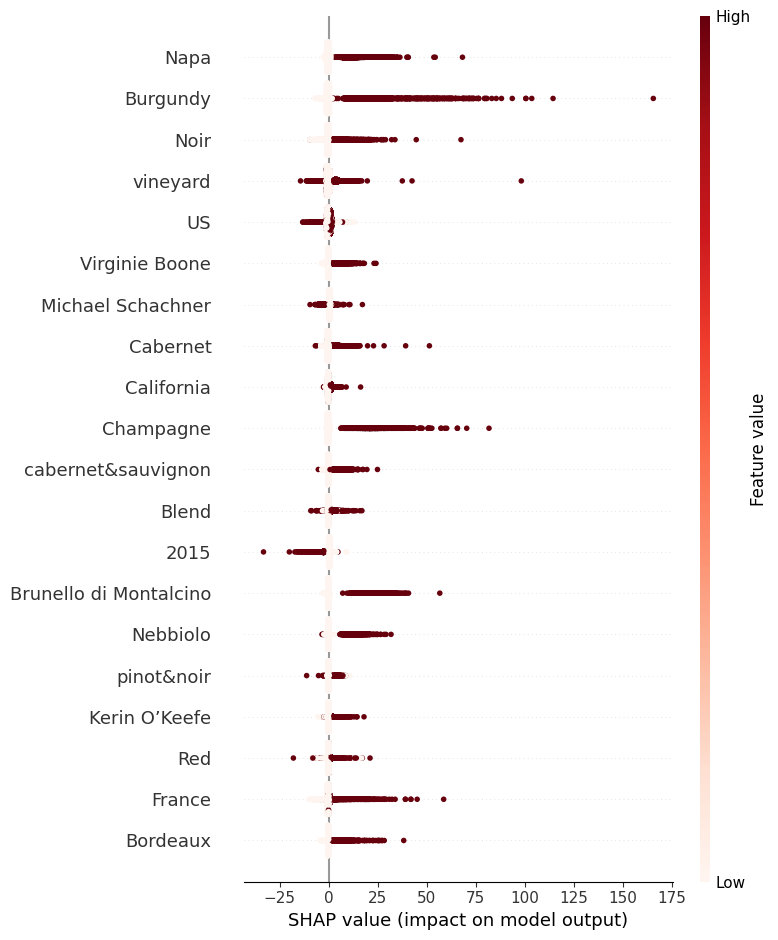

In [7]:
plot_summary_plot(explanation_test[:,1::], X_all.iloc[:,1::], 
                  word_filter_list=[], word_filter_exclusivity= True, max_display = 20)

### Let's compare the prices of three types of European sparkling wines.
### As one can see, Champagne is the most expensive.

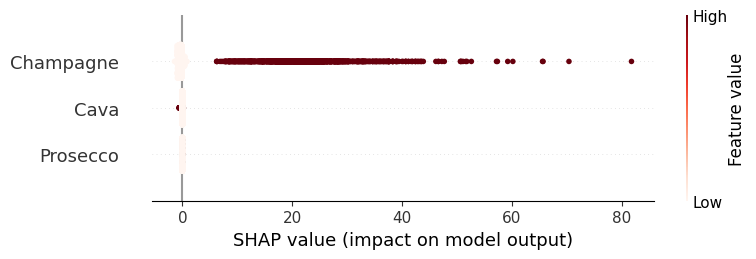

In [9]:
word_filter_list = ['prosecco', 'cava', 'champagne']
plot_bare_words(explanation_test, 
                X_all,
                word_filter_list=word_filter_list, 
                max_display = 100)

### The following words all mean "castle" in their respective language and they often appear
### on the labels of their wines.  (French, German, and Italian).
### What is their impact on the price of the wine?

['chateau', 'schloss', 'castello']


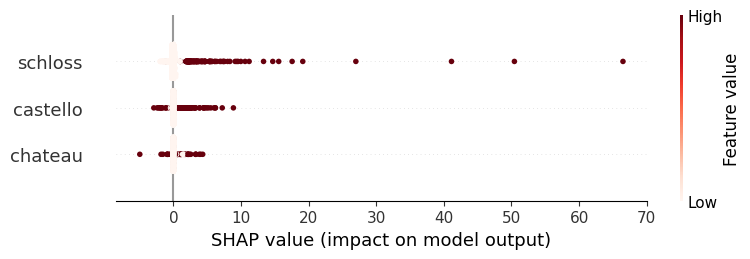

In [14]:
word_filter_list = ["chateau",
                    "schloss",
                    "castello"
                    ]

print(word_filter_list)
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=word_filter_list, word_filter_exclusivity= False, max_display = 3)

### Reserve is a good word in English/French and bring their price up.
### Do its counterparts in Italian (Riserva) and Spanish (Reserva) have the same impact?
### Yes in Italian, No in Spanish.
### It turns out in Spain at least, their is another class above called "Gran Reserva" which is the truly best class.

['reserve', 'riserva', 'reserva']


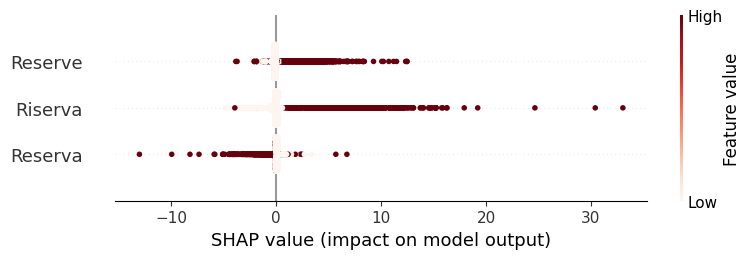

In [8]:
word_filter_list = ["reserve",
                    "riserva",
                    "reserva"]

print(word_filter_list)
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=word_filter_list, word_filter_exclusivity= False, max_display = 3)

## Here are some major red wine types.   
##  It is not surprising Cabernet (+Cabernet Sauvignon) is the most expensive.

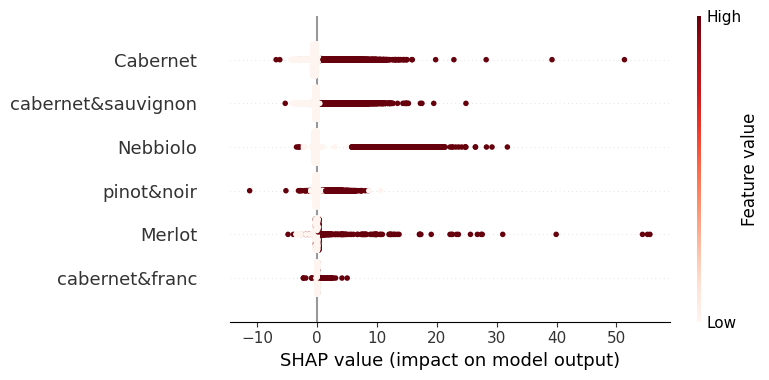

In [27]:
plot_bare_words(explanation_test, X_all, 
                  word_filter_list=['Cabernet', 'cabernet&sauvignon', 'cabernet&franc', 'Merlot', 'Nebbiolo', 'pinot&noir'], 
                save_png_name='grape_type',
                  max_display = 100)

### Below are some popular grapes for white wine. While all grapes span both positive 
### and negative impacts on the price, Champagne is the king, whereas Chardonnay has the clearest positive skew.

['champagne', 'Riesling', 'Chardonnay', 'sauvignon&blanc', 'Gewürztraminer']


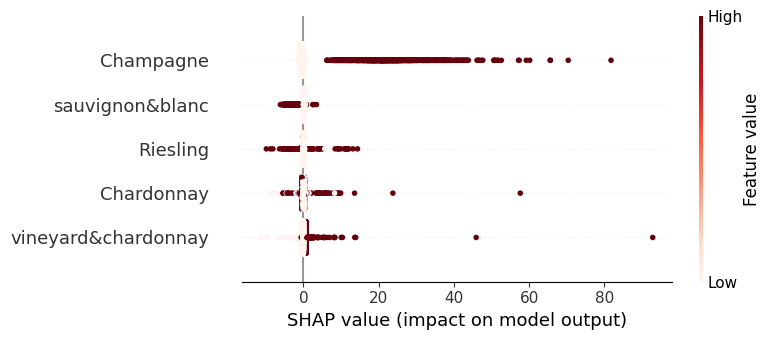

In [28]:
word_filter_list = ['champagne', 'Riesling', 'Chardonnay', 'sauvignon&blanc', 'Gewürztraminer']
print(word_filter_list)
plot_summary_plot(explanation_test, X_all, 
                  word_filter_list=word_filter_list, word_filter_exclusivity= False, max_display = 5)

## For all wines, Champagne clearly is the most expensive, but there are not Cabernet wines.

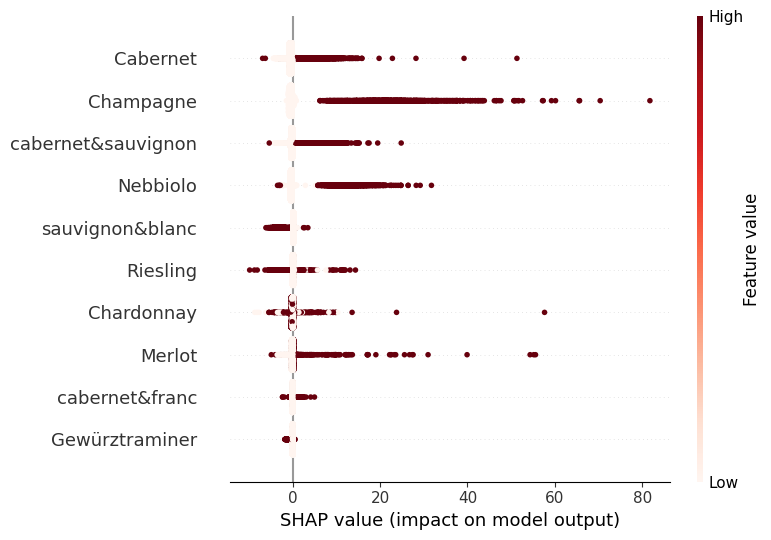

In [26]:
plot_bare_words(explanation_test, X_all, 
                  word_filter_list=['Cabernet', 'cabernet&sauvignon', 'cabernet&franc', 'Chardonnay', 'sauvignon&blanc', 
                                    'Gewürztraminer', 'Merlot', 'Champagne', 'Nebbiolo', 'Riesling'], 
                save_png_name='grape_type',
                  max_display = 100)

### Here is the impact of each taster.  Some tasters tend to taste expensive wines; others are more "democratic" in their taste.
### It is not possible to establish the causality, but it is possible the taster's rankings have an influence on the price also.

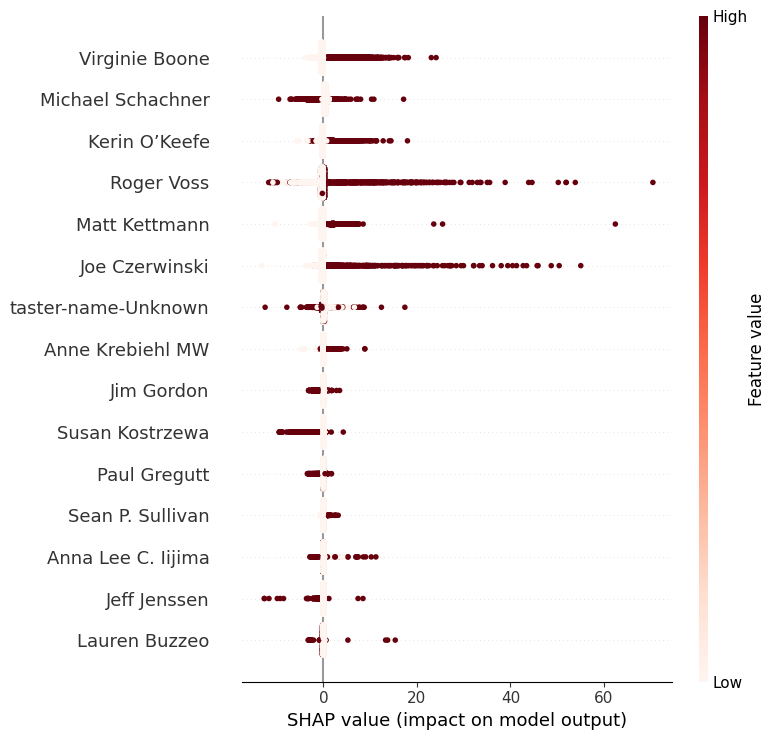

In [31]:
tasters = [feature.split("_")[-1] for feature in X_all.columns if "taster-name" in feature]
tasters
plot_bare_words(explanation_test, X_all, 
                  word_filter_list=tasters, 
                save_png_name="tasters", 
                max_display = 15)

### Below are a selected list of the countries of origin of the wine.  Perhaps not surprisingly, US wines tend to be cheaper.  
### It is true that some of the best wines in the world are from the US, such as Napa Valley and Sonoma, but there are a lot of wines that are more economical as well.

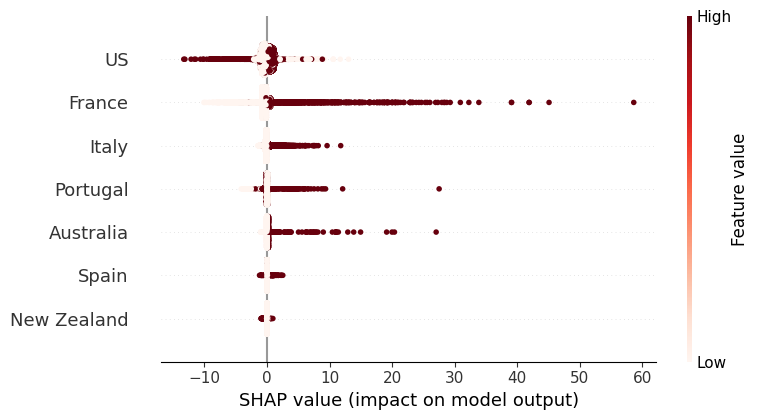

In [35]:
plot_bare_words(explanation_test, X_all, 
                  word_filter_list=['France', 'Italy', 'Portugal', 'US', 'Spain', 'New Zealand', 'Australia'], 
                  max_display = 20,
               save_png_name="nations")


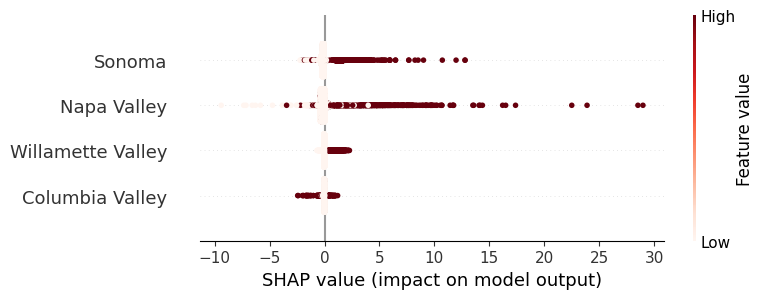

In [34]:

plot_bare_words(explanation_test, X_all, 
                  word_filter_list=['Napa Valley', 'Columbia Valley', 'Sonoma', 'Willamette Valley'], 
                save_png_name="west_coast_regions",
                  max_display = 20)

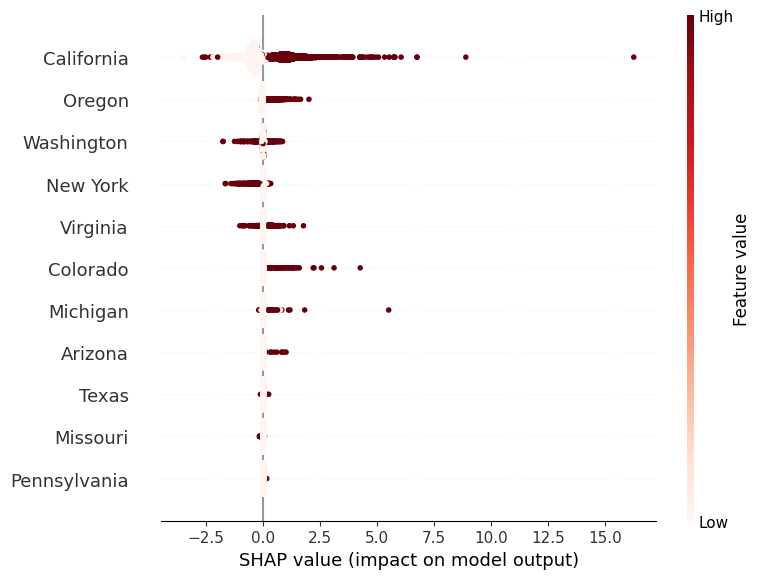

In [37]:
plot_bare_words(explanation_test, X_all, 
                  word_filter_list=['New York', 'California', 'Oregon', 'Texas', 'Colorado', 'Washington',
                                    'Michigan', 'Arizona', 'Missouri', 'Virginia', 'Pennsylvania'], 
                save_png_name="US_states",
                  max_display = 20)

### Finally, every knows the vintage year has a lot to do with the price.   
### While there is certainly geographical differences, there are some years that are globally good, such as 2006, 2007, , and some that are globally bad, such as 2014.

['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


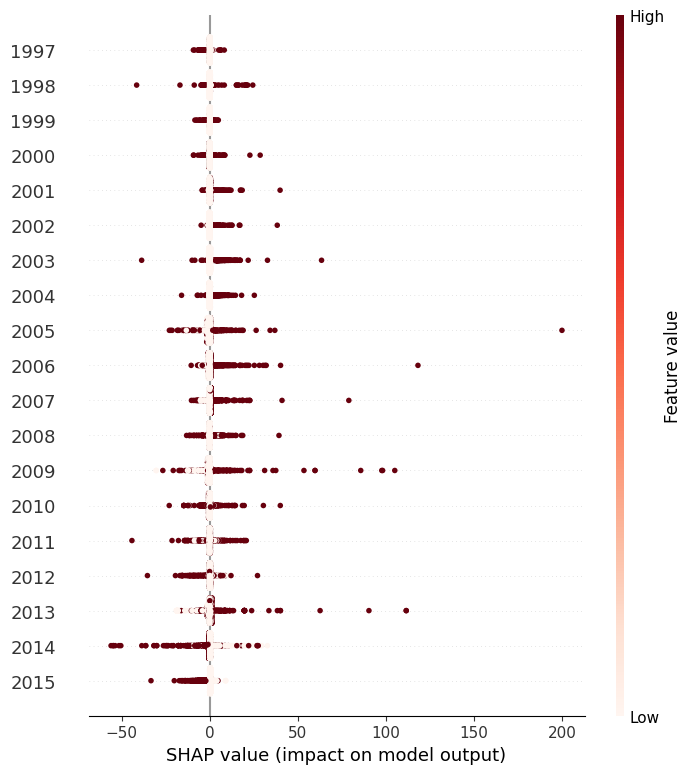

In [42]:
years = [col for col in map(lambda number: str(number), list(np.arange(1997, 2016, 1)))]
print(years)
full_feature_names = years
features_of_interest = [(feature, i) for i, feature in enumerate(X_all.columns) if feature.split('_')[-1].lower() in full_feature_names]
# print(features_of_interest)
features_of_interest_indices = [feature_w_word[1] for feature_w_word in features_of_interest]
feature_names_wo_prefx =[name[0].split("_")[-1] for name in features_of_interest]
# print(explanation_test.values[:,features_of_interest_indices])


col2num = {col: i for i, col in enumerate(feature_names_wo_prefx)}
order = list(map(col2num.get, feature_names_wo_prefx))
# print(feature_names_wo_prefx, order)
explanation_year = explanation_test
explanation_year.feature_names = [feature.split("_")[-1] for feature in explanation_year.feature_names]
                                  
shap.plots.beeswarm(explanation_year[:,features_of_interest_indices],
                        # feature_names=feature_names_wo_prefx,
                      # show_values_in_legend = True,
                      color =  'Reds',
                      max_display = 40,
                      show = False, 
                    order=order)
plt.savefig("years_order.png", format="png")
plt.show()

### Another useful function in the shap library is the waterfall plots. It can used to visualize the influences the predicted prices of an individual wines are.

### Below is a Bordeaux Supérieur from Château Meillier. The vertical line, shown as E[f(X)] on the x-axis at 35.53 dollars, is the mean price for all the wines. The bottom arrow shows the 3,107 least important features together pull the price down -3.67 dollars. Then the impact of the top 20 features is shown. One can see the most serious problem with this wine is the points received, norm-points = -0.529, pulled the price down -9.06 dollars. The best thing about the wine is it is a Bordeaux, which lifted its price by +1.08 dollars. The predicted price ended up to 15.88 dollars , which is with 22 percent of the actual price of 13 dollars.

### For further discussion, see the README.md file in the price_model folder.

Sample number: 14346, Sample index: 35535
RAW DATA:
POINTS: 87
TITLE: Château Meillier 2015  Bordeaux Supérieur
TASTER-NAME: Roger Voss
TASTER-TWITTER-HANDLE: @vossroger
PRICE: 13
DESIGNATION:  
VARIETY: Bordeaux-style Red Blend
REGION-1: Bordeaux Supérieur
REGION-2:  
PROVINCE: Bordeaux
COUNTRY: France
WINERY: Château Meillier

THE ACTUAL PRICE IS $13
FEATURIZED DATA FED INTO THE MODEL:
norm-points: -0.5290548417395042
TITLE feature: '2015' '2015&bordeaux' 'bordeaux&supérieur' 'château' 'supérieur' 
WINERY feature: 
REGION-1 feature: 'Bordeaux Supérieur' 
REGION-2 feature: 
PROVINCE feature: 
VARIETY feature: 'style' 
MERGED feature: 'Bordeaux' 'Red' 'Blend' 
TASTER-NAME feature: 'Roger Voss' 
Château Meillier 2015  Bordeaux Supérieur
Château Meillier 2015  Bordeaux Supérieur, Actual price = $13


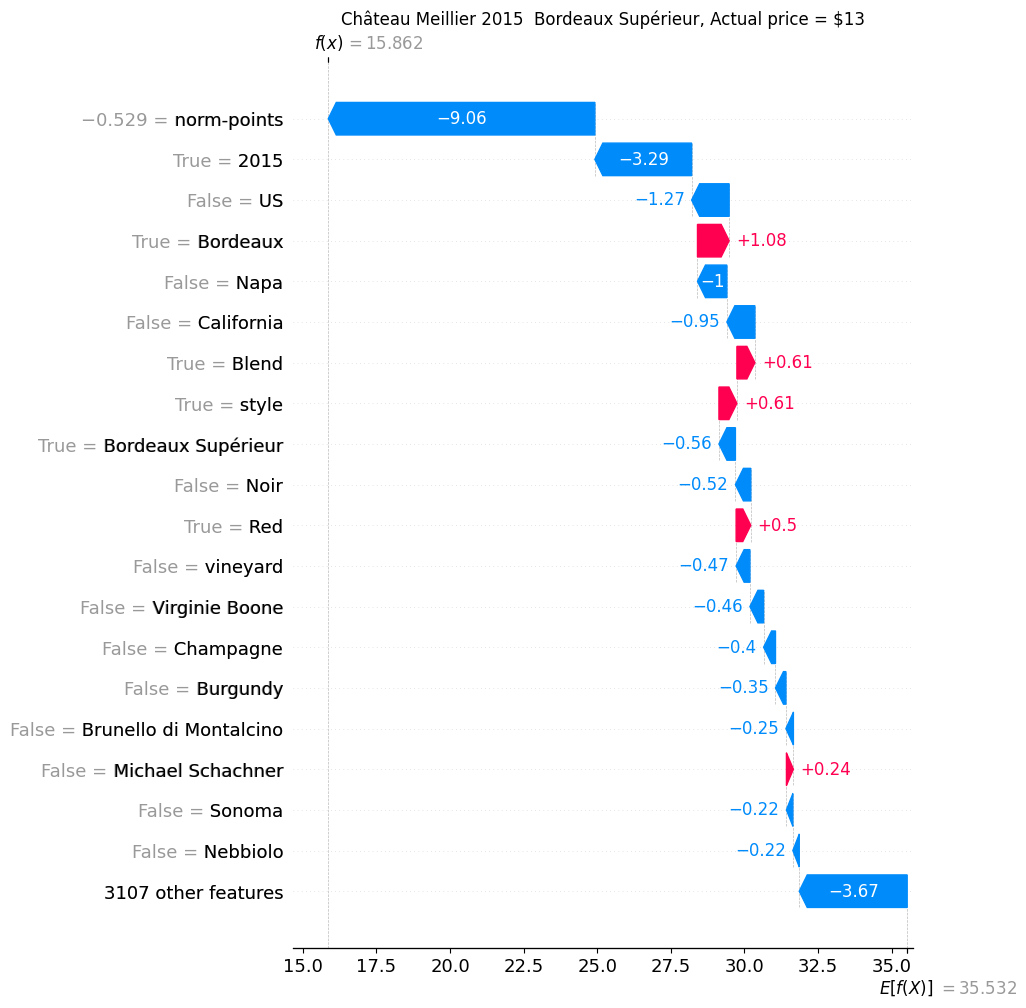

In [43]:
plot_waterfall(explanation_test, X_all, df = df_all, sample_index = 35535, y_all = y_all, max_display = 20, save_png_name = "Château_Meillier")


Sample number: 86358, Sample index: 14440
RAW DATA:
POINTS: 91
TITLE: Mas Igneus 2006 Coster de l'Ermita Red (Priorat)
TASTER-NAME: Michael Schachner
TASTER-TWITTER-HANDLE: @wineschach
PRICE: 105
DESIGNATION: Coster de l'Ermita
VARIETY: Red Blend
REGION-1: Priorat
REGION-2:  
PROVINCE: Catalonia
COUNTRY: Spain
WINERY: Mas Igneus

THE ACTUAL PRICE IS $105
FEATURIZED DATA FED INTO THE MODEL:
norm-points: 1.3535279874385604
TITLE feature: '2006' 'mas' 
WINERY feature: 
REGION-1 feature: 'Priorat' 
REGION-2 feature: 
PROVINCE feature: 'Catalonia' 
VARIETY feature: 
MERGED feature: 'Spain' 'Red' 'Blend' 
TASTER-NAME feature: 'Michael Schachner' 
Mas Igneus 2006 Coster de l'Ermita Red (Priorat)
Mas Igneus 2006 Coster de l'Ermita Red (Priorat), Actual price = $105


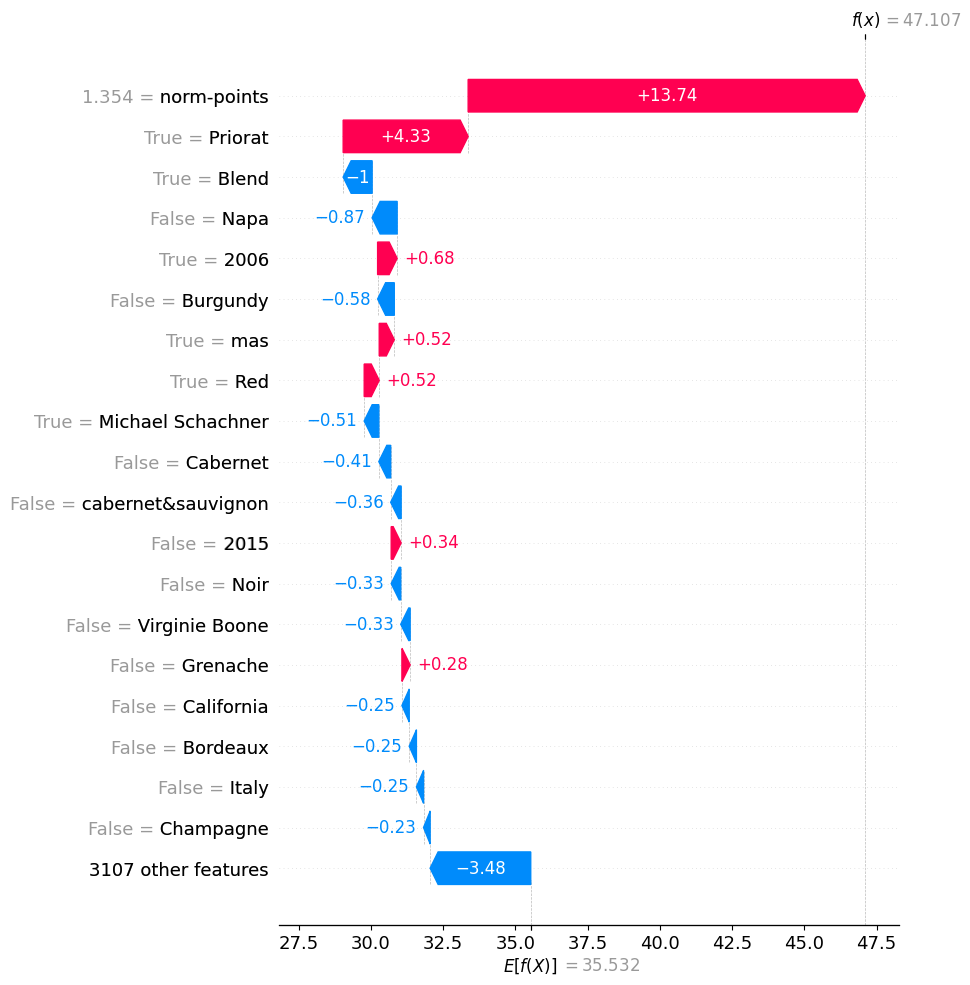

In [118]:
plot_waterfall(explanation_test, X_all, df = df_all, sample_index = None, price_target=100, y_all = y_all, max_display = 20)


Sample number: 6423, Sample index: 93844
RAW DATA:
POINTS: 87
TITLE: Duckhorn 2012 Cabernet Sauvignon (Napa Valley)
TASTER-NAME: Virginie Boone
TASTER-TWITTER-HANDLE: @vboone
PRICE: 72
DESIGNATION:  
VARIETY: Cabernet Sauvignon
REGION-1: Napa Valley
REGION-2: Napa
PROVINCE: California
COUNTRY: US
WINERY: Duckhorn

THE ACTUAL PRICE IS $72
FEATURIZED DATA FED INTO THE MODEL:
norm-points: -0.7160085902432148
TITLE feature: '2012' '2012&cabernet' 'cabernet&sauvignon' 
WINERY feature: 'Duckhorn' 
REGION-1 feature: 'Napa Valley' 
REGION-2 feature: 
PROVINCE feature: 
VARIETY feature: 
MERGED feature: 'Napa' 'California' 'Sauvignon' 'Cabernet' 
TASTER-NAME feature: 'Virginie Boone' 
Duckhorn 2012 Cabernet Sauvignon (Napa Valley)
Duckhorn 2012 Cabernet Sauvignon (Napa Valley), Actual price = $72


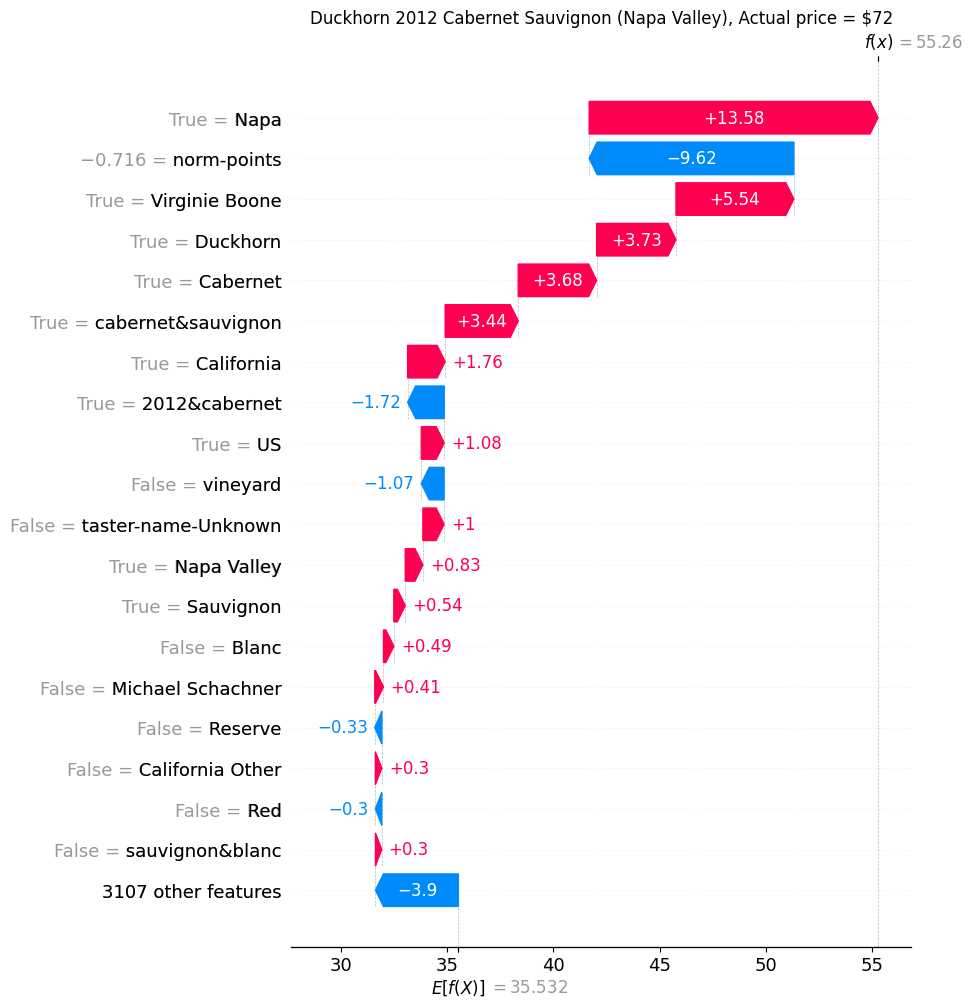

In [45]:
plot_waterfall(explanation_test, X_all, df = df_all, sample_index = 93844, 
               y_all = y_all, max_display = 20, save_png_name = 'Duckhorn_2012')


Sample number: 57439, Sample index: 4865
RAW DATA:
POINTS: 87
TITLE: Kunde 2013 Reserve Century Vines Zinfandel (Sonoma Valley)
TASTER-NAME: Virginie Boone
TASTER-TWITTER-HANDLE: @vboone
PRICE: 50
DESIGNATION: Reserve Century Vines
VARIETY: Zinfandel
REGION-1: Sonoma Valley
REGION-2: Sonoma
PROVINCE: California
COUNTRY: US
WINERY: Kunde

THE ACTUAL PRICE IS $50
FEATURIZED DATA FED INTO THE MODEL:
norm-points: -0.7160085902432148
TITLE feature: '2013' '2013&reserve' 'vines' 
WINERY feature: 'Kunde' 
REGION-1 feature: 'Sonoma Valley' 
REGION-2 feature: 
PROVINCE feature: 
VARIETY feature: 
MERGED feature: 'Zinfandel' 'Reserve' 'California' 'Sonoma' 
TASTER-NAME feature: 'Virginie Boone' 
Kunde 2013 Reserve Century Vines Zinfandel (Sonoma Valley)
Kunde 2013 Reserve Century Vines Zinfandel (Sonoma Valley), Actual price = $50


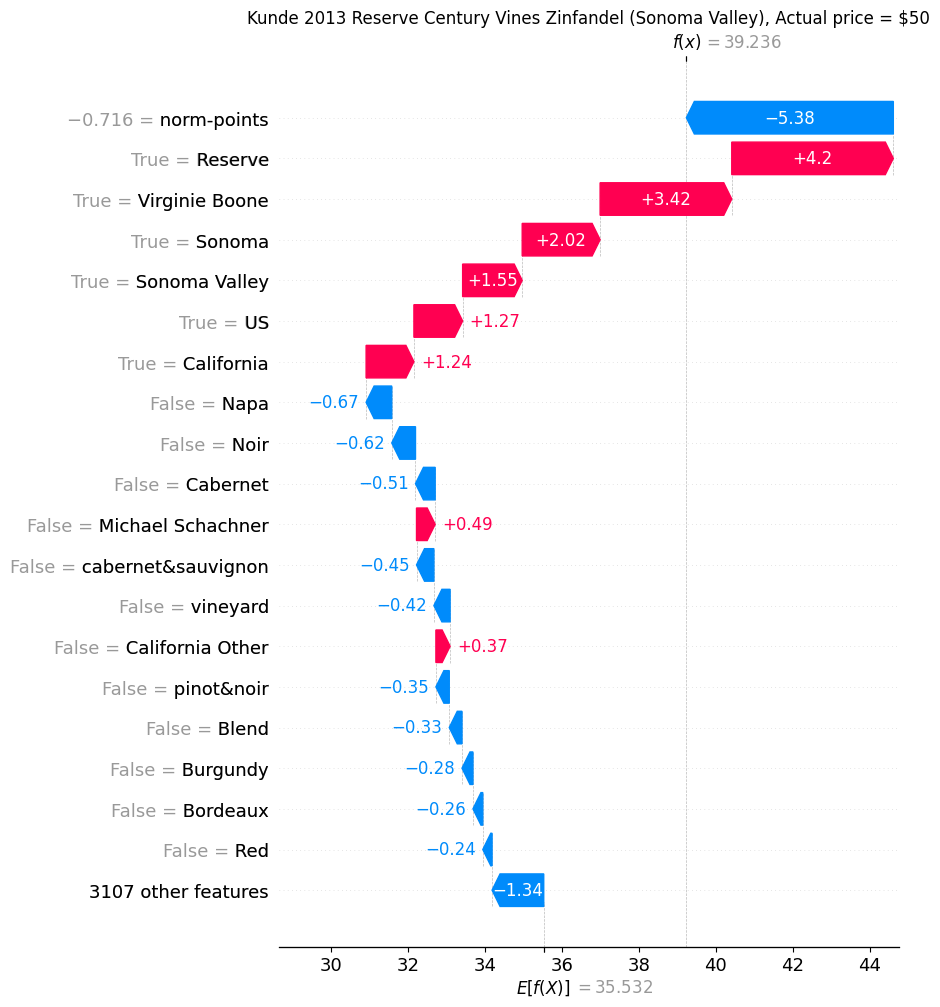

In [46]:
plot_waterfall(explanation_test, X_all, sample_index = 4865, df = df_all, 
               y_all = y_all, max_display = 20, price_target=50, save_png_name = 'kunde_2013_zin')


Sample number: 16404, Sample index: 125847
RAW DATA:
POINTS: 95
TITLE: Gaja 2009 Costa Russi Nebbiolo (Langhe)
TASTER-NAME:  
TASTER-TWITTER-HANDLE:  
PRICE: 495
DESIGNATION: Costa Russi
VARIETY: Nebbiolo
REGION-1: Langhe
REGION-2:  
PROVINCE: Piedmont
COUNTRY: Italy
WINERY: Gaja

THE ACTUAL PRICE IS $495
FEATURIZED DATA FED INTO THE MODEL:
norm-points: 2.1605106831213723
TITLE feature: '2009' 
WINERY feature: 
REGION-1 feature: 'Langhe' 
REGION-2 feature: 
PROVINCE feature: 
VARIETY feature: 
MERGED feature: 'Nebbiolo' 'Piedmont' 'Italy' 
TASTER-NAME feature: 'taster-name-Unknown' 
Gaja 2009 Costa Russi Nebbiolo (Langhe)
Gaja 2009 Costa Russi Nebbiolo (Langhe), Actual price = $495


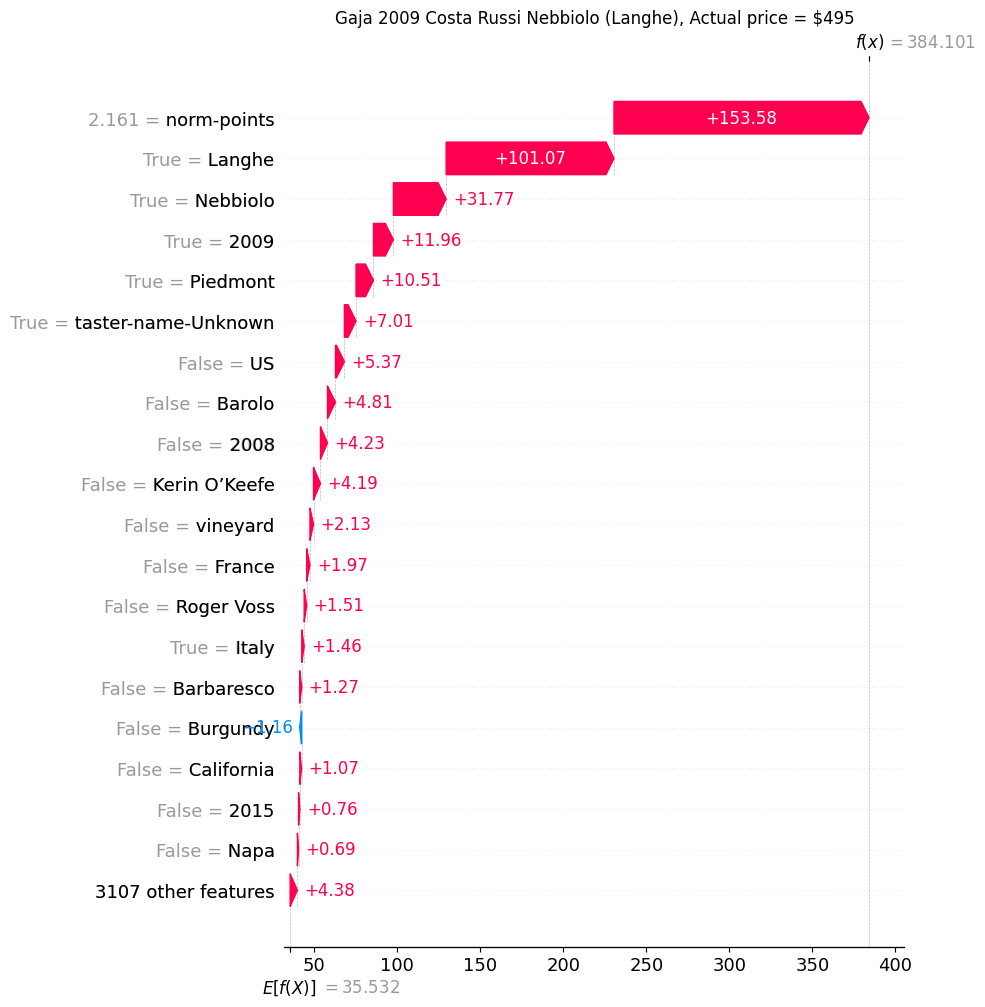

In [47]:
plot_waterfall(explanation_test, X_all, df = df_all, sample_index = 125847, 
               y_all = y_all, max_display = 20, price_target=500, save_png_name ='Gaja_2009_Nebbiolo')


Sample number: 5625, Sample index: 38966
RAW DATA:
POINTS: 94
TITLE: Vietti 2010 Rocche di Castiglione  (Barolo)
TASTER-NAME: Kerin O’Keefe
TASTER-TWITTER-HANDLE: @kerinokeefe
PRICE: 150
DESIGNATION: Rocche di Castiglione
VARIETY: Nebbiolo
REGION-1: Barolo
REGION-2:  
PROVINCE: Piedmont
COUNTRY: Italy
WINERY: Vietti

THE ACTUAL PRICE IS $150
FEATURIZED DATA FED INTO THE MODEL:
norm-points: 2.003097630679266
TITLE feature: '2010' 
WINERY feature: 'Vietti' 
REGION-1 feature: 
REGION-2 feature: 
PROVINCE feature: 
VARIETY feature: 
MERGED feature: 'Barolo' 'Nebbiolo' 'Piedmont' 'Italy' 
TASTER-NAME feature: 'Kerin O’Keefe' 
Vietti 2010 Rocche di Castiglione  (Barolo)
Vietti 2010 Rocche di Castiglione  (Barolo), Actual price = $150


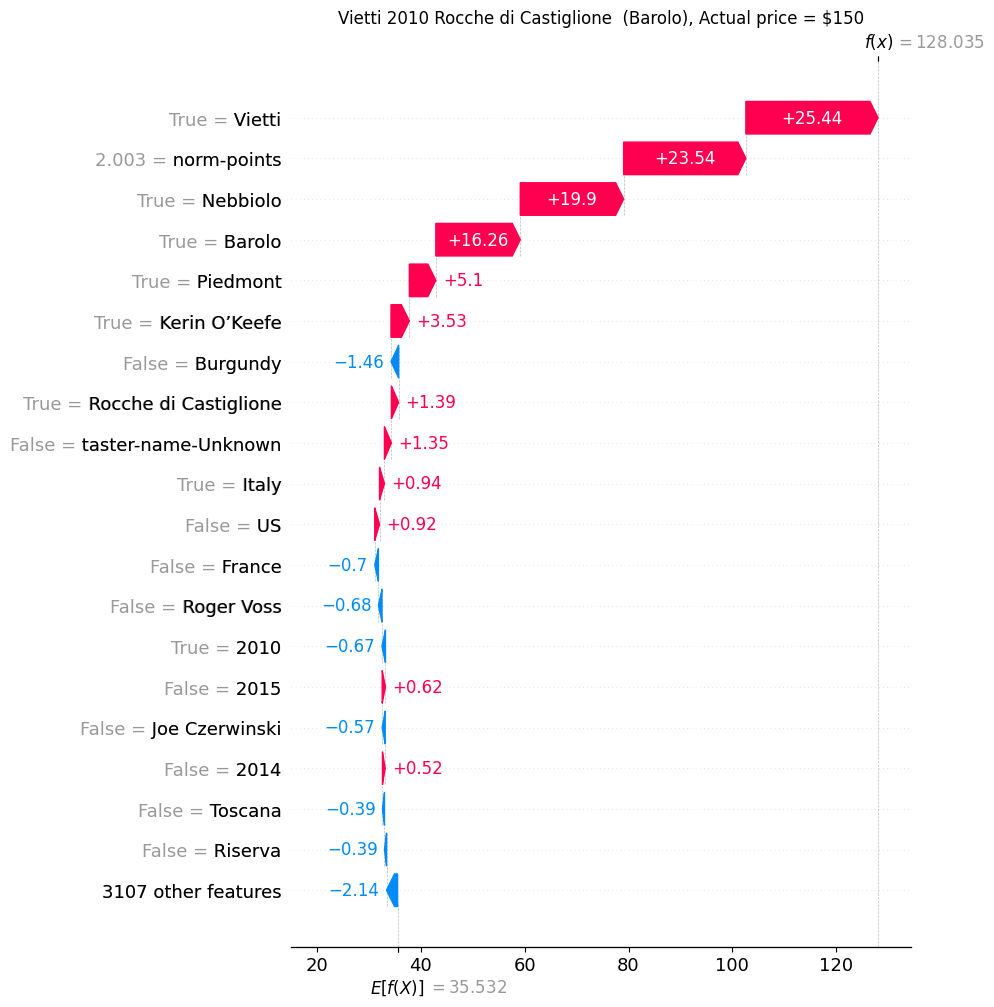

In [48]:
plot_waterfall(explanation_test, X_all, df = df_all, sample_index = 38966, y_all = y_all, max_display = 20, price_target=150, 
               save_png_name = 'vietti_barolo+2010'
              )

Sample number: 70965, Sample index: 41441
RAW DATA:
POINTS: 94
TITLE: Kopke 1935 Colheita White  (Port)
TASTER-NAME: Roger Voss
TASTER-TWITTER-HANDLE: @vossroger
PRICE: 980
DESIGNATION: Colheita White
VARIETY: Port
REGION-1:  
REGION-2:  
PROVINCE: Port
COUNTRY: Portugal
WINERY: Kopke

THE ACTUAL PRICE IS $980
FEATURIZED DATA FED INTO THE MODEL:
norm-points: 1.7582483231979762
TITLE feature: 
WINERY feature: 'Kopke' 
REGION-1 feature: 
REGION-2 feature: 
PROVINCE feature: 
VARIETY feature: 
MERGED feature: 'Colheita' 'Portugal' 'Port' 'White' 
TASTER-NAME feature: 'Roger Voss' 
Kopke 1935 Colheita White  (Port)
Kopke 1935 Colheita White  (Port), Actual price = $980


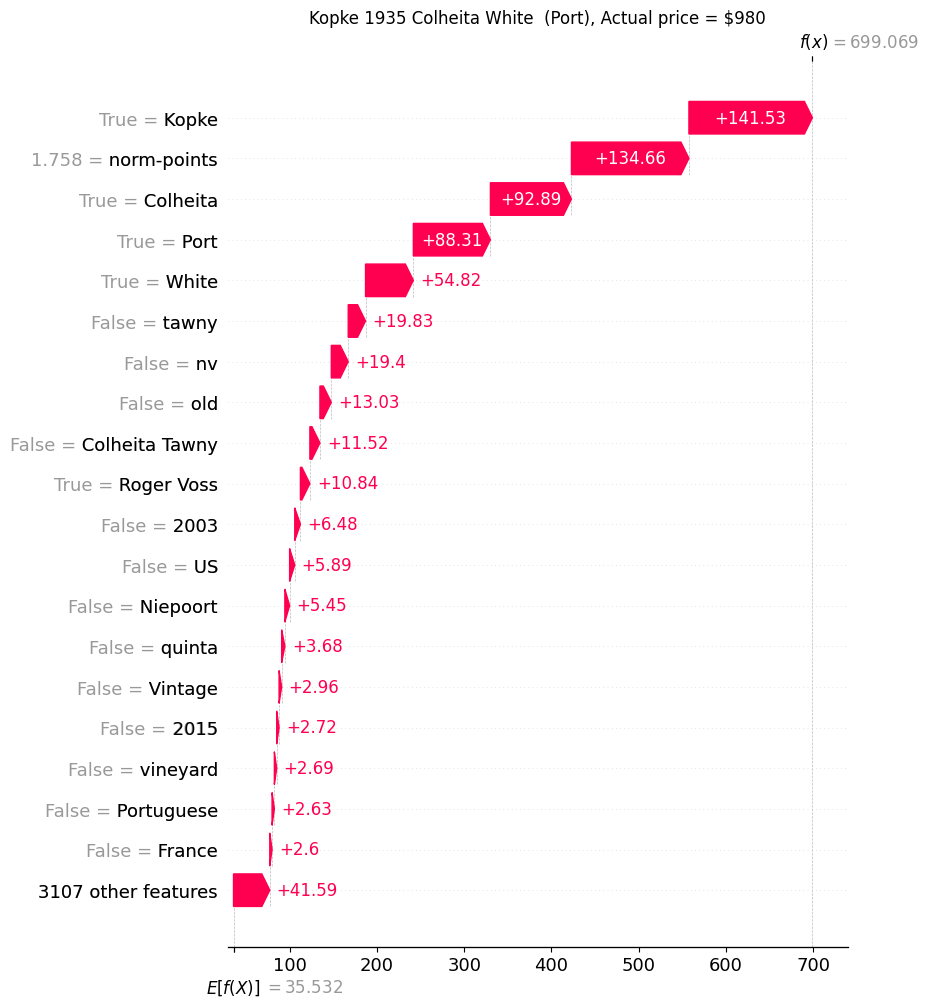

In [49]:
plot_waterfall(explanation_test, X_all, df = df_all, sample_index = 41441, 
               y_all = y_all, max_display = 20, price_target=1000, save_png_name = 'Kopke-1935')

Sample number: 1311, Sample index: 81740
RAW DATA:
POINTS: 85
TITLE: Bontzu 2014 Gewürztraminer (Walla Walla Valley (WA))
TASTER-NAME: Sean P. Sullivan
TASTER-TWITTER-HANDLE: @wawinereport
PRICE: 16
DESIGNATION:  
VARIETY: Gewürztraminer
REGION-1: Walla Walla Valley (WA)
REGION-2: Columbia Valley
PROVINCE: Washington
COUNTRY: US
WINERY: Bontzu

THE ACTUAL PRICE IS $16
FEATURIZED DATA FED INTO THE MODEL:
norm-points: -1.4898596750209654
TITLE feature: '2014' 'valley' 'walla' 'walla&valley' 'walla&walla' 
WINERY feature: 
REGION-1 feature: 'Walla Walla Valley (WA)' 
REGION-2 feature: 'Columbia Valley' 
PROVINCE feature: 
VARIETY feature: 
MERGED feature: 'Gewürztraminer' 'Washington' 
TASTER-NAME feature: 'Sean P. Sullivan' 
Bontzu 2014 Gewürztraminer (Walla Walla Valley (WA))
Bontzu 2014 Gewürztraminer (Walla Walla Valley (WA)), Actual price = $16


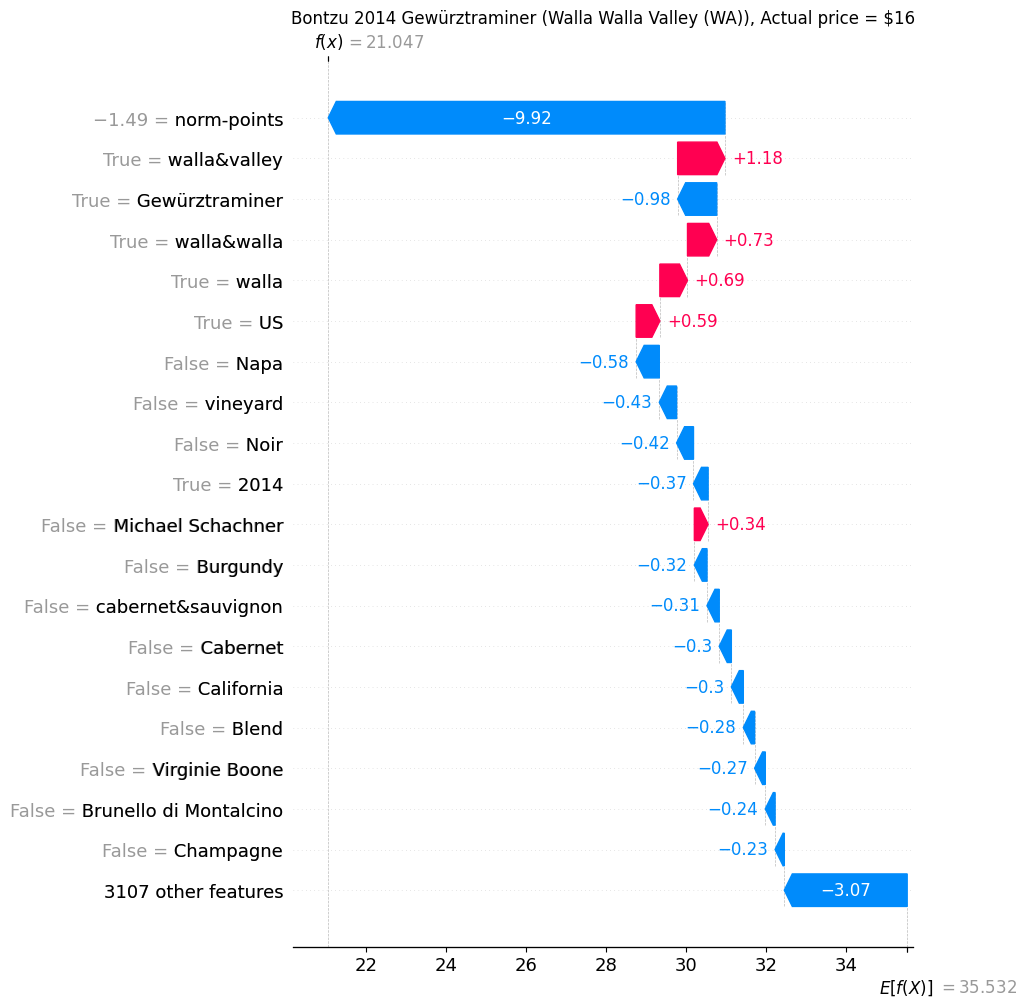

In [50]:
plot_waterfall(explanation_test, X_all, df = df_all, sample_index = 81740, y_all = y_all, max_display = 20, price_target=15,
              save_png_name = "Bontzu_2014_Gewürztraminer"
              )